In [21]:
# Data Analysis library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
exoplanets = pd.read_csv('data/exoplanets_discovered.csv', delimiter=',')
exoplanets

,loc_rowid,discoverymethod,disc_year,disc_facility,pl_orbper,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_dens,pl_eqt
0,1,Radial Velocity,2007,Xinglong Station,326.030000,12.1,1.08,6165.60000,19.4000,19.100,NaN
1,2,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.219970,12.3,1.09,4684.81420,14.7400,13.800,NaN
2,3,Radial Velocity,2008,Okayama Astrophysical Observatory,185.840000,12.9,1.15,1525.50000,4.8000,3.900,NaN
3,4,Radial Velocity,2002,W. M. Keck Observatory,1773.400020,12.9,1.15,1481.08780,4.6600,3.790,NaN
4,5,Radial Velocity,1996,Multiple Observatories,798.500000,13.5,1.20,565.73740,1.7800,1.260,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5049,5050,Radial Velocity,1996,Lick Observatory,4.617033,14.0,1.25,218.53100,0.6876,0.438,NaN
5050,5051,Radial Velocity,1999,Multiple Observatories,241.258000,12.3,1.10,4443.24113,13.9800,13.100,NaN
5051,5052,Radial Velocity,1999,Multiple Observatories,1276.460000,12.5,1.11,3257.74117,10.2500,9.170,NaN
5052,5053,Radial Velocity,2021,Okayama Astrophysical Observatory,385.200000,14.2,1.27,162.09249,0.5100,0.311,NaN


In [23]:
exoplanets['discoverymethod'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics',
       'Orbital Brightness Modulation', 'Pulsation Timing Variations',
       'Microlensing', 'Transit Timing Variations', 'Pulsar Timing'],
      dtype=object)

/home/juancv3d/.pyenv/versions/3.8.10/envs/Data-Analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Exoplanets Discovered by method')

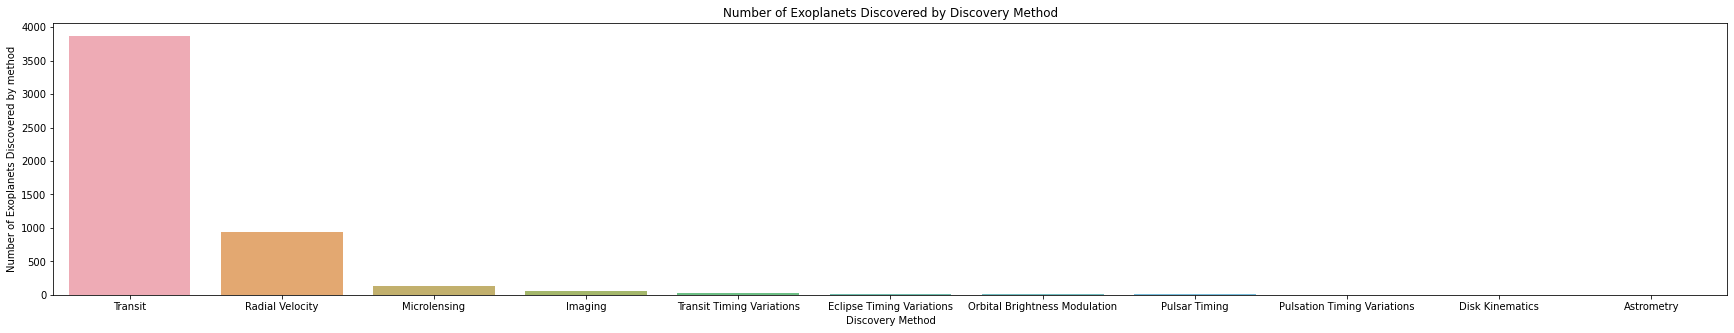

In [24]:
discovery_methods_count = exoplanets['discoverymethod'].value_counts()
discovery_methods_count
plt.figure(figsize=(30, 5))
sns.barplot(discovery_methods_count.index, discovery_methods_count.values, alpha=0.8)
# size plot
# tittle number of finding by type not normalized 
plt.title('Number of Exoplanets Discovered by Discovery Method')
plt.xlabel('Discovery Method')
plt.ylabel('Number of Exoplanets Discovered by method')



Text(0, 0.5, 'Number of Exoplanets Discovered')

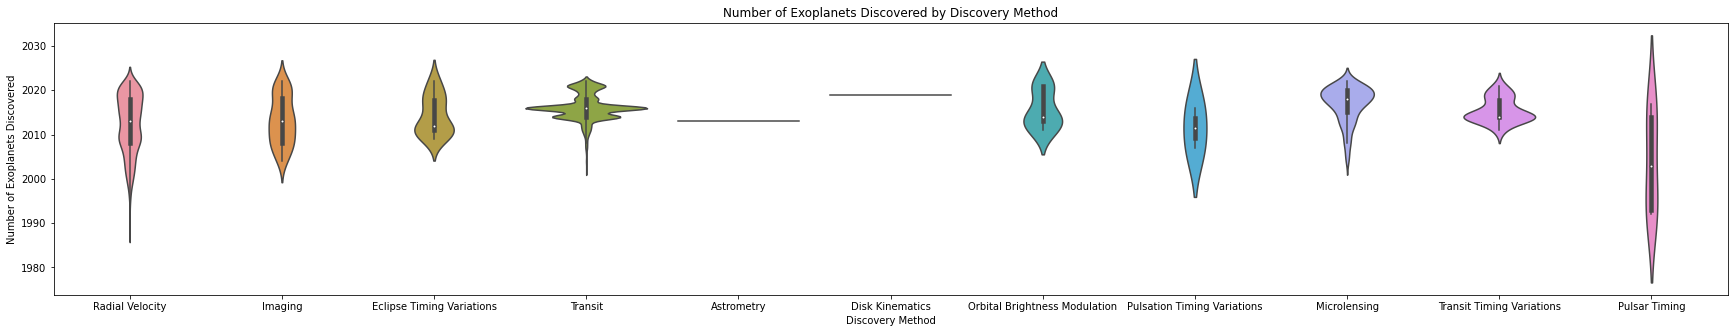

In [25]:
#violin plot
plt.figure(figsize=(30, 5))
sns.violinplot(x='discoverymethod', y='disc_year', data=exoplanets)
# size plot
# tittle number of finding by type not normalized
plt.title('Number of Exoplanets Discovered by Discovery Method')
plt.xlabel('Discovery Method')
plt.ylabel('Number of Exoplanets Discovered')


<AxesSubplot:>

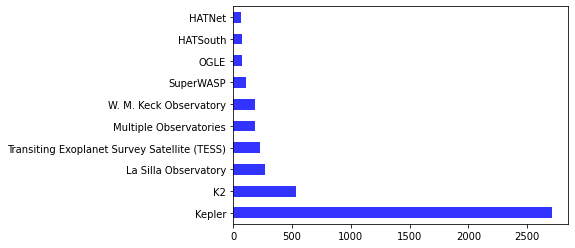

In [33]:
# number of descovery by facility
exoplanets['disc_facility'].value_counts().head(10).plot(kind='barh', color='blue', alpha=0.8)


In [26]:
x = np.array(exoplanets["discoverymethod"])
discovery_types = np.unique(x)
min_year = exoplanets['disc_year'].min()
max_year = exoplanets['disc_year'].max()
print(min_year, max_year)


1989 2022


In [27]:
# Make array of years and types
exoplanets_years = pd.DataFrame()
for year in range(min_year, max_year + 1):
  discovery_type_list = []
  for index, discovery_type in enumerate(discovery_types):
    numPlanets = 0
    if year > min_year:
      # numplanets is the cumulative total.
      numPlanets = exoplanets_years.at[index,year-1]
    numPlanets += pd.Series.sum((exoplanets['disc_year'] == year) & (exoplanets['discoverymethod'] == discovery_type))
    discovery_type_list.append(numPlanets)
  exoplanets_years[year] = discovery_type_list
exoplanets_years.insert(0, "Discovery Type", discovery_types)

In [28]:
exoplanets_years

,Discovery Type,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Astrometry,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Disk Kinematics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,Eclipse Timing Variations,0,0,0,0,0,0,0,0,0,...,10,10,11,11,13,14,16,16,16,18
3,Imaging,0,0,0,0,0,0,0,0,0,...,34,36,41,43,44,45,49,51,58,60
4,Microlensing,0,0,0,0,0,0,0,0,0,...,25,31,35,45,54,75,89,108,126,130
5,Orbital Brightness Modulation,0,0,0,0,0,0,0,0,0,...,3,6,6,6,6,6,6,6,9,9
6,Pulsar Timing,0,0,0,2,2,3,3,3,3,...,5,5,5,5,7,7,7,7,7,7
7,Pulsation Timing Variations,0,0,0,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2
8,Radial Velocity,1,1,1,1,1,1,2,8,9,...,476,527,574,623,672,721,788,833,912,934
9,Transit,0,0,0,0,0,0,0,0,0,...,360,1162,1262,2720,2809,3062,3175,3341,3756,3870


<AxesSubplot:>

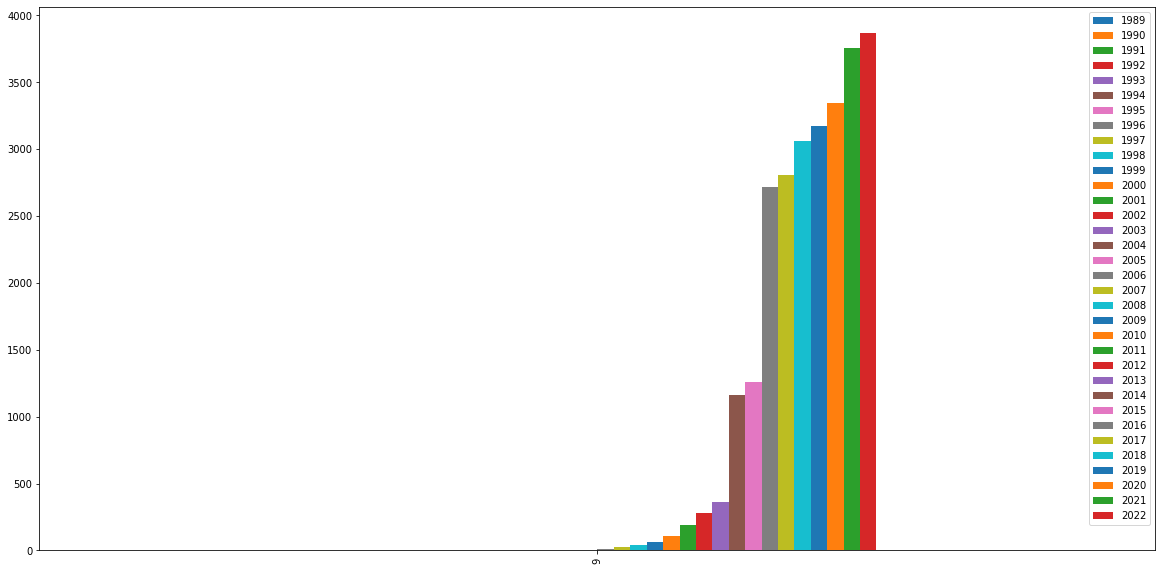

In [29]:
exoplanets_years[exoplanets_years['Discovery Type'] == 'Transit'].plot(kind='bar', figsize=(20,10))